
 # Informe Tecnico:  Redes Recurrentes

Integrantes: Pamela Aldana<br>
             
          

Docente. Carlos Correa

Asignatura: Deep Learning
Sección: DLY0200

Desarrollar un modelo de RNN para estimar el precio de una acción y generar modelos predictivos que generalicen la respuesta, manipulando parámetros y/o hiperparametros.
 <br>
Para ello debe seleccionar una acción de yahoo finance, para realizarlo debe ejecutar las siguientes acciones:

- Descargar los datos de la página mencionada usando la librería de Python yfinance.
- Seleccionar los datos y prepararlos para generar la serie de tiempo con el precio de cierre de la acción.
- Generar arquitecturas de RNN probando de menos a mas, controlando los distintos hyperparametros que le permitan llegar a buenas métricas de desempeño del modelo.
- Generar manipulación de hyperparametros que permitan implementar modelos predictivos con buen desempeño.
- Por ultimo visualizar la calidad de las predicciones generadas por el modelo.
- Debe comentar todo el proceso y comentar los cambios o mejoras que realice en la NN, justificando el uso o cambio de todas las mejoras que realice en la red, visualizando y comentando posibles desajustes de la misma.

#FASE 1 :COMPRENDER EL NEGOCIO

##**Contexto**

**Yahoo Finance en Modelos Predictivos**

Yahoo Finance proporciona estos datos a través de su API y su integración con Python a través de la librería yfinance.Se construira un modelo predictivo de precios de acciones, y se usaran los datos históricos.

#FASE 2 :COMPRENDER LOS DATOS

**Variables  del Dataset de Yahoo Finance:**

- Precio de Apertura (Open): Precio al que una acción abre al comienzo del día de trading.
- Precio de Cierre (Close): Precio al que una acción cierra al final del día de trading.
- Precio Máximo (High): Precio más alto alcanzado durante el día de trading.
- Precio Mínimo (Low): Precio más bajo alcanzado durante el día de trading.
- Volumen (Volume): Número total de acciones negociadas durante el día.
- Precio de Cierre Ajustado (Adj Close): Precio de cierre ajustado por dividendos y splits.

## Importar librerías

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##Carga de datos

Se utiliza la librería yfinance para descargar los datos históricos de la acción desde Yahoo Finance. Se instala yfinance y se descargan los datos.<br>Se selecciona una acción,que es AAPL (Apple Inc.). Se descargan los datos históricos de la acción de Apple

In [87]:
import yfinance as yf

# Descargar datos de AAPL
ticker = 'AAPL'
#(ORIGINAL)data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
data = yf.download(ticker)
# Mostrar las primeras filas
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097335,48630400
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102072,37363200
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106380,46950400
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111978,48003200


In [88]:
data.shape

(10972, 6)

El dataset contiene 10972 registros y 6 variables.

In [64]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

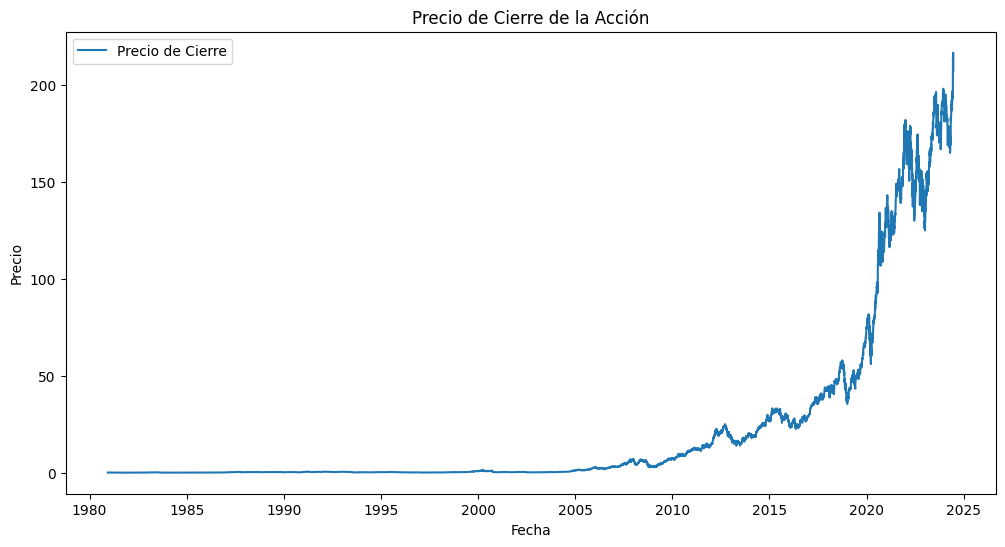

               Open          High           Low         Close     Adj Close  \
count  10972.000000  10972.000000  10972.000000  10972.000000  10972.000000   
mean      21.825339     22.060776     21.600017     21.839355     21.044097   
std       45.013752     45.498465     44.564243     45.050546     44.608697   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.297991      0.303571      0.290179      0.297991      0.241951   
50%        0.526786      0.535535      0.516116      0.526786      0.428584   
75%       19.931250     20.155356     19.740804     19.915178     17.152645   
max      217.589996    220.199997    213.000000    216.669998    216.669998   

             Volume  
count  1.097200e+04  
mean   3.187028e+08  
std    3.356050e+08  
min    0.000000e+00  
25%    1.136686e+08  
50%    2.061808e+08  
75%    3.990910e+08  
max    7.421641e+09  


In [89]:
# Visualización de los datos
def visualizar_datos(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre')
    plt.title('Precio de Cierre de la Acción')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

# Estadísticas descriptivas
def estadisticas_descriptivas(data):
    print(data.describe())


visualizar_datos(data)
estadisticas_descriptivas(data)

Seleccionar la Columna de Precio de Cierre
- Columna 'Close' que representa el precio de cierre de la acción.

In [83]:
# Seleccionar solo el precio de cierre
df = data[['Close']].copy()
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Se normalizaran los datos y se crearan  secuencias temporales para el modelo RNN.
<br>

1. Partición en train/val/test (80%, 10%, 10%)
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [68]:
# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

Preparamos los datos para generar secuencias supervisadas. Definimos funciones para crear datasets supervisados y luego dividimos los datos en conjuntos de entrenamiento, validación y prueba.

 **Partición en Train/Val/Test (80%, 10%, 10%)**
Dividimos los datos normalizados en conjuntos de entrenamiento, validación y prueba.

Se define una función train_val_test_split para dividir la serie temporal del precio de cierre en tres conjuntos: entrenamiento, validación y prueba. Esto permite evaluar y ajustar el modelo en diferentes etapas para evitar sobreajuste.

In [90]:
def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1):
    # Definir número de datos en la serie
    N = serie.shape[0]

    # Calcular el tamaño de cada subconjunto
    Ntrain = int(tr_size * N)  # Número de datos de entrenamiento
    Nval = int(vl_size * N)    # Número de datos de validación
    Ntest = N - Ntrain - Nval  # Número de datos de prueba

    # Realizar partición
    train = serie[:Ntrain]
    val = serie[Ntrain:Ntrain + Nval]
    test = serie[Ntrain + Nval:Ntrain + Nval + Ntest]

    return train, val, test


In [92]:
# Definir la serie de tiempo (por ejemplo, el precio de cierre)
serie = data['Close']

# Llamar a la función para dividir los datos
tr, vl, ts = train_val_test_split(serie)

# Mostrar tamaños de los conjuntos resultantes
print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (8777,)
Tamaño set de validación: (1097,)
Tamaño set de prueba: (1098,)


Esta función asegura que los conjuntos de datos estén ordenados temporalmente, lo cual es esencial para la correcta evaluación de modelos de predicción de series temporales, como los basados en redes neuronales recurrentes (RNN).

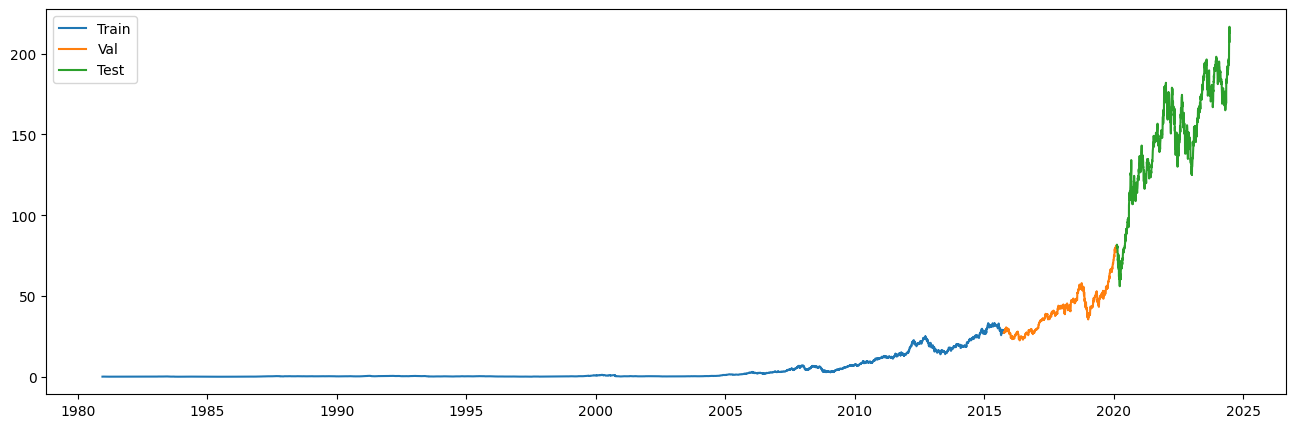

In [93]:

# Visualizar las particiones
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend()
plt.show()

**[texto del enlace](https://)Crear el Dataset Supervisado**


Se genera el dataset supervisado: entrada y salida del modelo.
Se convertiremos la serie de tiempo en secuencias supervisadas, donde cada secuencia de entrada (X) tendrá INPUT_LENGTH días y la salida correspondiente (Y) será el siguiente día (OUTPUT_LENGTH).

In [94]:
import numpy as np

def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape

    if len(shape) == 1:  # Si tenemos sólo una serie (univariado)
        array = array.reshape(-1, 1)
        shape = array.shape

    fils, cols = shape

    # Generar los arreglos
    for i in range(fils - input_length - output_length + 1):
        X.append(array[i:i + input_length, :])  # Input_length x cols
        Y.append(array[i + input_length:i + input_length + output_length, -1])  # Output_length x 1

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y


In [96]:
# Definir longitud de entrada y salida para el modelo LSTM
INPUT_LENGTH = 30    # Ajustar según sea necesario
OUTPUT_LENGTH = 1    # Modelo unipaso

# Crear datasets supervisados
x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños de entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños de entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH)
Set de entrenamiento - x_tr: (8747, 30, 1), y_tr: (8747, 1)
Set de validación - x_vl: (1067, 30, 1), y_vl: (1067, 1)
Set de prueba - x_ts: (1068, 30, 1), y_ts: (1068, 1)


In [106]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los datasets de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'x_ts':x_ts, 'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for _ in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(data_input['x_tr'][:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(data_input['x_vl'][:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(data_input['x_ts'][:,:,i])

    # Escalamiento Ys (solo ajustar y transformar)
    y_tr_s = scalers[-1].fit_transform(data_input['y_tr'])
    y_vl_s = scalers[-1].transform(data_input['y_vl'])
    y_ts_s = scalers[-1].transform(data_input['y_ts'])

    # Ajustar la forma para mantener la consistencia con Xs (agregar dimensión de tiempo)
    y_tr_s = y_tr_s.reshape((y_tr_s.shape[0], 1, 1))
    y_vl_s = y_vl_s.reshape((y_vl_s.shape[0], 1, 1))
    y_ts_s = y_ts_s.reshape((y_ts_s.shape[0], 1, 1))

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[-1]  # Retornar el último escalador usado para Ys

# Ejemplo de cómo usar la función para escalar los datos
# Suponiendo que ya tienes definidos x_tr, y_tr, x_vl, y_vl, x_ts, y_ts como se mostró anteriormente

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación de los mínimos y máximos
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: 0.04910700023174286/22.584999084472656/56.092498779296875
Min x_tr/x_vl/x_ts con escalamiento: -1.0/0.3575473457535143/2.3760171317956007

Min y_tr/y_vl/y_ts sin escalamiento: 0.04910700023174286/22.584999084472656/60.227500915527344
Min y_tr/y_vl/y_ts con escalamiento: -1.0/0.3575473457535143/2.625106946112302

Max x_tr/x_vl/x_ts sin escalamiento: 33.25/81.30249786376953/216.6699981689453
Max x_tr/x_vl/x_ts con escalamiento: 1.0/3.894650927859377/12.049100285960717

Max y_tr/y_vl/y_ts sin escalamiento: 33.25/81.30249786376953/216.6699981689453
Max y_tr/y_vl/y_ts con escalamiento: 1.0/3.894650927859377/12.049100285960717


Se crea  dataset supervisado convierte la serie de tiempo en un formato adecuado para el entrenamiento de la RNN. Usa ventanas deslizantes de longitud INPUT_LENGTH para generar características de entrada (X) y de longitud OUTPUT_LENGTH para generar etiquetas (Y). Este proceso ayuda a la RNN a aprender la dinámica temporal de la serie.

**Generación del Dataset Supervisado**
Creamos secuencias temporales supervisadas para alimentar el modelo RNN. Esto implica definir ventanas de tiempo como entradas y salidas del modelo.

**Escalado de los Datos**

Se Escala el dataset en el rango de -1 a 1.

   

Los datos se escalan en el rango [-1, 1] usando MinMaxScaler. Esto facilita la convergencia durante el entrenamiento del modelo y mejora la estabilidad numérica. El escalado se basa en el set de entrenamiento y se aplica a los sets de validación y prueba

**Escalamiento de los Datos**
Finalmente, escalamos los datos de entrenamiento, validación y prueba. Es importante usar el mismo escalador que se usó para los datos de entrenamiento en los conjuntos de validación y prueba para mantener la coherencia en la escala

Escalar los datos mejora la eficiencia del entrenamiento. El escalado basado en el conjunto de entrenamiento garantiza que la información futura no se filtre a los modelos de entrenamiento.

#FASE 4 MODELADO

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()


##MODELO 1

In [107]:

# Definición de parámetros
N_UNITS = 128  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (24, 1) para batches x input-length x features
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)

# Crear el modelo LSTM
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear'))  # Capa de salida para regresión lineal

# Función de pérdida: RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# Compilar el modelo
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 80
BATCH_SIZE = 256
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')


# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(x_ts_s, y_ts_s)
print(f'Pérdida en el conjunto de prueba (RMSE): {resultado}')

# Hacer predicciones
predicciones = modelo.predict(x_ts_s)




Epoch 1/80
35/35 - 9s - loss: 0.7263 - val_loss: 1.1991 - 9s/epoch - 271ms/step
Epoch 2/80
35/35 - 4s - loss: 0.3868 - val_loss: 0.9218 - 4s/epoch - 106ms/step
Epoch 3/80
35/35 - 4s - loss: 0.0830 - val_loss: 0.7591 - 4s/epoch - 122ms/step
Epoch 4/80
35/35 - 6s - loss: 0.0524 - val_loss: 0.5931 - 6s/epoch - 170ms/step
Epoch 5/80
35/35 - 4s - loss: 0.0326 - val_loss: 0.4709 - 4s/epoch - 113ms/step
Epoch 6/80
35/35 - 5s - loss: 0.0248 - val_loss: 0.4189 - 5s/epoch - 135ms/step
Epoch 7/80
35/35 - 4s - loss: 0.0238 - val_loss: 0.4099 - 4s/epoch - 118ms/step
Epoch 8/80
35/35 - 4s - loss: 0.0233 - val_loss: 0.3950 - 4s/epoch - 106ms/step
Epoch 9/80
35/35 - 4s - loss: 0.0230 - val_loss: 0.3854 - 4s/epoch - 118ms/step
Epoch 10/80
35/35 - 5s - loss: 0.0227 - val_loss: 0.3686 - 5s/epoch - 136ms/step
Epoch 11/80
35/35 - 4s - loss: 0.0227 - val_loss: 0.3743 - 4s/epoch - 109ms/step
Epoch 12/80
35/35 - 4s - loss: 0.0223 - val_loss: 0.3606 - 4s/epoch - 106ms/step
Epoch 13/80
35/35 - 5s - loss: 0.0221

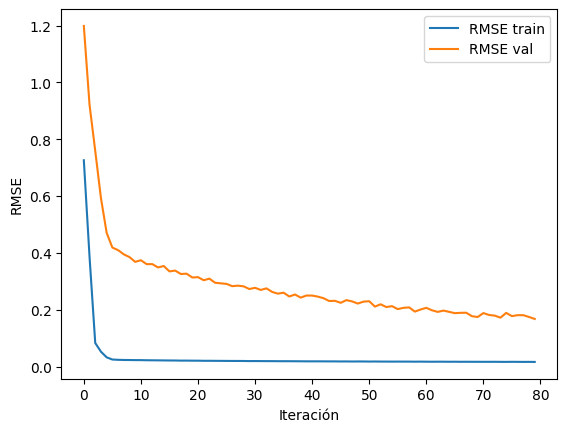

In [108]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [109]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')


Comparativo desempeños:
  RMSE train:	 0.014
  RMSE val:	 0.154
  RMSE test:	 4.759


##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Creemos primero una función para generar las predicciones:

In [110]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x, verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)


Analicemos este desempeño gráficamente mostrando las 'Close' originales y las predichas por el modelo para cada uno de los datos en el set de prueba:

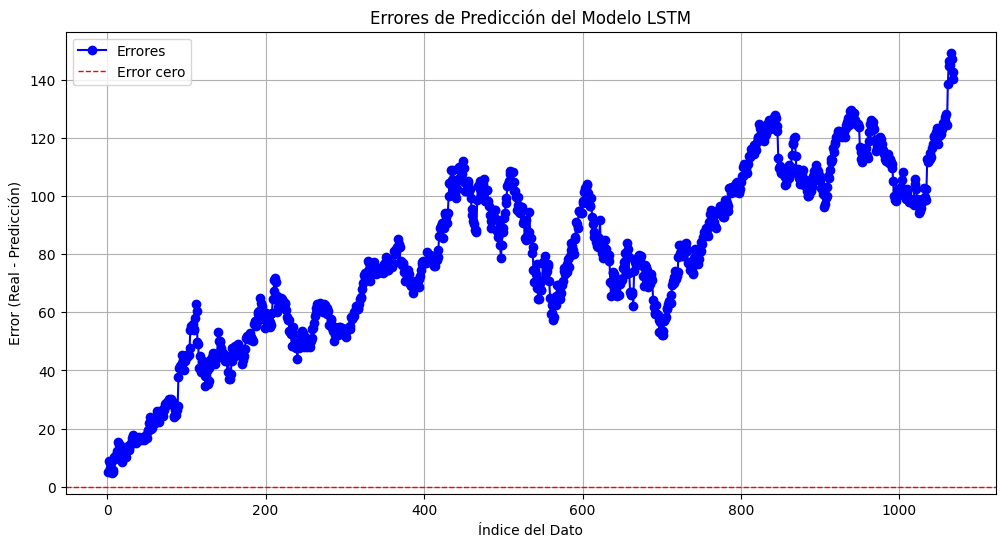

In [111]:
# Calcular el número de predicciones
N = len(y_ts_pred)

# Crear índices para los datos
ndato = np.linspace(1, N, N)

# Calcular los errores simples
errores = y_ts.flatten() - y_ts_pred

# Graficar los errores
plt.figure(figsize=(12, 6))
plt.plot(ndato, errores, marker='o', linestyle='-', color='b', label='Errores')
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Error cero')
plt.title('Errores de Predicción del Modelo LSTM')
plt.xlabel('Índice del Dato')
plt.ylabel('Error (Real - Predicción)')
plt.legend()
plt.grid(True)
plt.show()

##MODELO 2

Este modelo utiliza dos capas LSTM consecutivas, con el objetivo de capturar patrones más complejos en los datos secuenciales.

Se define un modelo secuencial con dos capa LSTM con 128 unidades y  capa densa final para predecir el precio de cierre. Se utiliza RMSprop como optimizador y RMSE como función de pérdida, adecuada para tareas de regresión

In [114]:
# Modelo 2: LSTM con dos capas LSTM
# Definición de parámetros
N_UNITS = 128  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (24, 1) para batches x input-length x features
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)

modelo_2 = Sequential()
modelo_2.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE, return_sequences=True))
modelo_2.add(LSTM(N_UNITS))
modelo_2.add(Dense(OUTPUT_LENGTH, activation='linear'))

# Definir la pérdida (RMSE) y el optimizador
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

optimizador = RMSprop(learning_rate=5e-5)
modelo_2.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error,
)
# Compilar el modelo


# Entrenamiento del modelo
EPOCHS = 50
BATCH_SIZE = 64
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)

# Evaluación del modelo en el conjunto de prueba
rmse_tr_2 = modelo_2.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_2 = modelo_2.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_2 = modelo_2.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print('Modelo 2 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_2:.3f}')
print(f'  RMSE val:\t {rmse_vl_2:.3f}')
print(f'  RMSE test:\t {rmse_ts_2:.3f}')


Epoch 1/50
137/137 - 8s - loss: 0.0160 - val_loss: 0.1616 - 8s/epoch - 59ms/step
Epoch 2/50
137/137 - 6s - loss: 0.0159 - val_loss: 0.1588 - 6s/epoch - 46ms/step
Epoch 3/50
137/137 - 8s - loss: 0.0159 - val_loss: 0.1476 - 8s/epoch - 58ms/step
Epoch 4/50
137/137 - 6s - loss: 0.0158 - val_loss: 0.1482 - 6s/epoch - 46ms/step
Epoch 5/50
137/137 - 14s - loss: 0.0155 - val_loss: 0.1523 - 14s/epoch - 99ms/step
Epoch 6/50
137/137 - 8s - loss: 0.0154 - val_loss: 0.1495 - 8s/epoch - 58ms/step
Epoch 7/50
137/137 - 8s - loss: 0.0154 - val_loss: 0.1341 - 8s/epoch - 59ms/step
Epoch 8/50
137/137 - 8s - loss: 0.0154 - val_loss: 0.1425 - 8s/epoch - 59ms/step
Epoch 9/50
137/137 - 11s - loss: 0.0152 - val_loss: 0.1326 - 11s/epoch - 80ms/step
Epoch 10/50
137/137 - 7s - loss: 0.0152 - val_loss: 0.1310 - 7s/epoch - 52ms/step
Epoch 11/50
137/137 - 8s - loss: 0.0151 - val_loss: 0.1347 - 8s/epoch - 59ms/step
Epoch 12/50
137/137 - 7s - loss: 0.0149 - val_loss: 0.1420 - 7s/epoch - 49ms/step
Epoch 13/50
137/137 -

Modelo 3 - Comparativo de desempeños:
  RMSE train:	 0.933
  RMSE val:	 1.605
  RMSE test:	 8.175


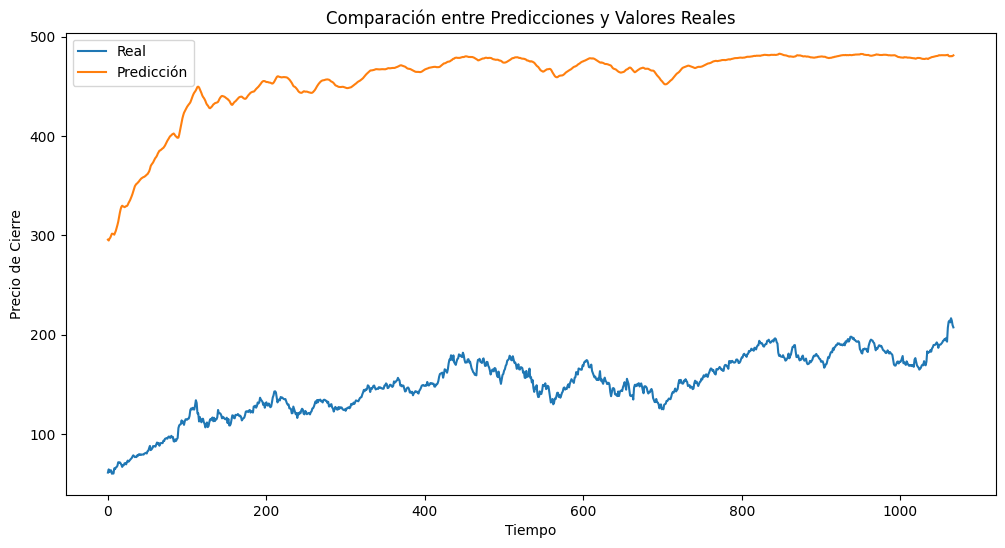

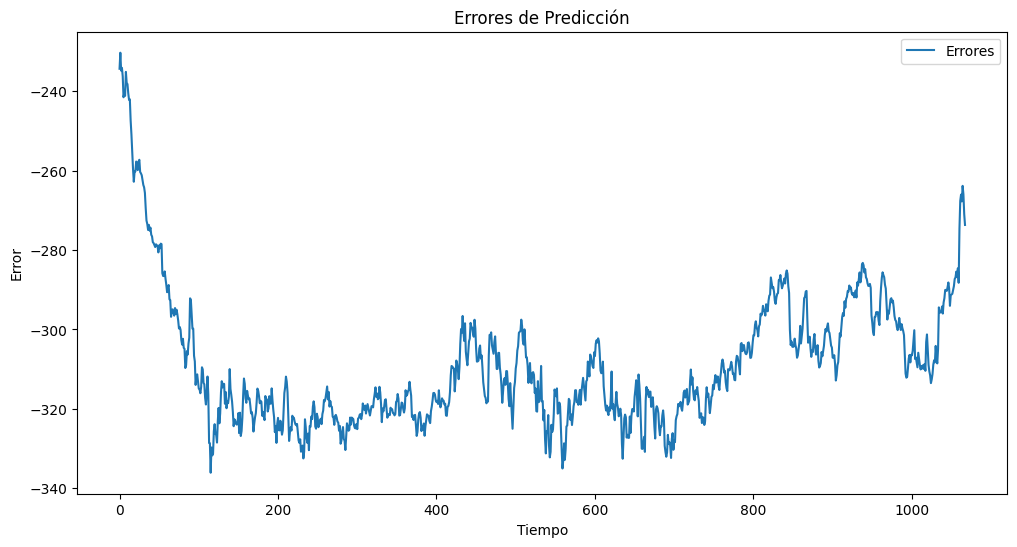

In [119]:

# Evaluación del modelo en el conjunto de prueba
rmse_tr_3 = modelo_2.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_3 = modelo_2.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_3 = modelo_2.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

print('Modelo 3 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_2:.3f}')
print(f'  RMSE val:\t {rmse_vl_2:.3f}')
print(f'  RMSE test:\t {rmse_ts_2:.3f}')

# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(data_s['x_ts_s'], modelo, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()

## Modelo 3: LSTM con Dropout
Este modelo incorpora regularización mediante la técnica de dropout en las capas LSTM para prevenir el sobreajuste.

El dropout ayuda a regularizar el modelo al desactivar aleatoriamente una fracción de las unidades durante el entrenamiento, lo que puede mejorar la generalización del modelo.

Dropout: Se introdujo una capa de Dropout después de la capa LSTM para mejorar la generalización del modelo y reducir el sobreajuste. Se utilizó una tasa de Dropout del 20% (Dropout(0.2)).

- optimizador_3 = SGD
- N_UNITS = 256
- EPOCHS = 70
- BATCH_SIZE = 128

Aumento de unidades LSTM: Se incrementó el número de unidades en la capa LSTM de 128 a 256 (N_UNITS = 256). Esto proporciona al modelo una capacidad mayor para capturar patrones complejos en los datos secuenciales.

In [117]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
# Definición de parámetros
N_UNITS = 256 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)


# Modelo 3: LSTM con dropout
modelo_3 = Sequential()
modelo_3.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE, dropout=0.2, recurrent_dropout=0.2))
modelo_3.add(Dense(OUTPUT_LENGTH, activation='linear'))

# Compilar el modelo
optimizador_3 = SGD(learning_rate=5e-5)
modelo_3.compile(optimizer=optimizador_3, loss=root_mean_squared_error)


# Entrenamiento del modelo
EPOCHS = 70
BATCH_SIZE = 128
historia_3 = modelo_3.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)

# Evaluación del modelo en el conjunto de prueba
rmse_tr_3 = modelo_3.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_3 = modelo_3.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_3 = modelo_3.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print('Modelo 3 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_3:.3f}')
print(f'  RMSE val:\t {rmse_vl_3:.3f}')
print(f'  RMSE test:\t {rmse_ts_3:.3f}')


Epoch 1/70
69/69 - 32s - loss: 0.9708 - val_loss: 1.6496 - 32s/epoch - 471ms/step
Epoch 2/70
69/69 - 28s - loss: 0.9507 - val_loss: 1.6419 - 28s/epoch - 407ms/step
Epoch 3/70
69/69 - 27s - loss: 0.9309 - val_loss: 1.6342 - 27s/epoch - 385ms/step
Epoch 4/70
69/69 - 25s - loss: 0.9111 - val_loss: 1.6266 - 25s/epoch - 365ms/step
Epoch 5/70
69/69 - 22s - loss: 0.8914 - val_loss: 1.6189 - 22s/epoch - 317ms/step
Epoch 6/70
69/69 - 23s - loss: 0.8715 - val_loss: 1.6112 - 23s/epoch - 338ms/step
Epoch 7/70
69/69 - 26s - loss: 0.8521 - val_loss: 1.6034 - 26s/epoch - 378ms/step
Epoch 8/70
69/69 - 23s - loss: 0.8324 - val_loss: 1.5957 - 23s/epoch - 339ms/step
Epoch 9/70
69/69 - 22s - loss: 0.8132 - val_loss: 1.5880 - 22s/epoch - 315ms/step
Epoch 10/70
69/69 - 24s - loss: 0.7938 - val_loss: 1.5803 - 24s/epoch - 351ms/step
Epoch 11/70
69/69 - 29s - loss: 0.7742 - val_loss: 1.5724 - 29s/epoch - 415ms/step
Epoch 12/70
69/69 - 30s - loss: 0.7550 - val_loss: 1.5645 - 30s/epoch - 436ms/step
Epoch 13/70
6

Modelo 3 - Comparativo de desempeños:
  RMSE train:	 0.104
  RMSE val:	 1.042
  RMSE test:	 6.038


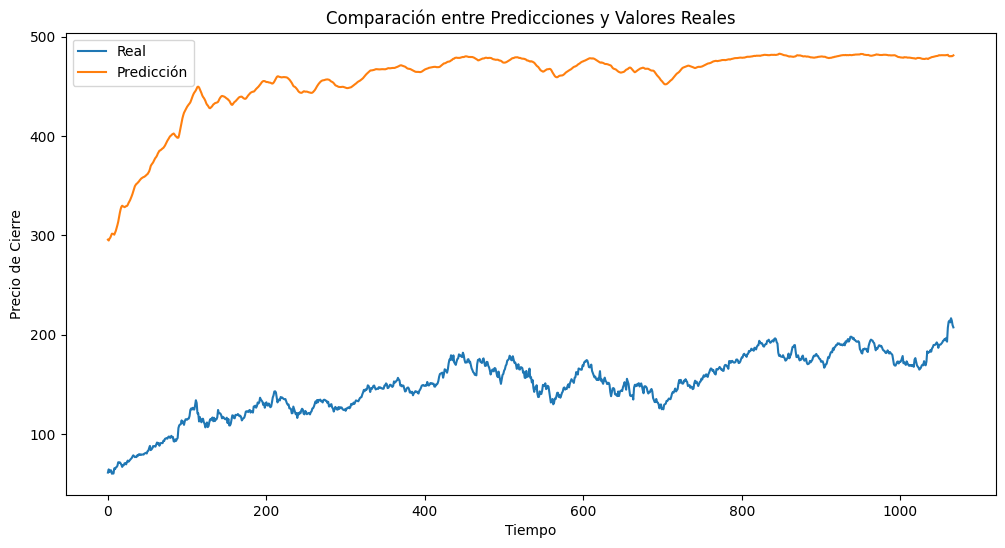

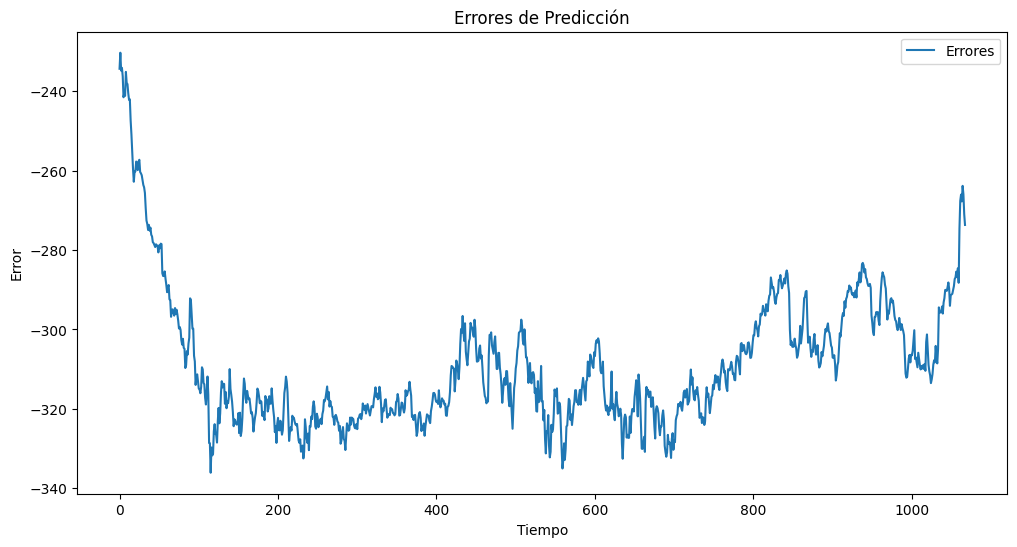

In [120]:

# Evaluación del modelo en el conjunto de prueba
rmse_tr_3 = modelo_3.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_3 = modelo_3.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_3 = modelo_3.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

print('Modelo 3 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_3:.3f}')
print(f'  RMSE val:\t {rmse_vl_3:.3f}')
print(f'  RMSE test:\t {rmse_ts_3:.3f}')

# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(data_s['x_ts_s'], modelo, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()

#Modelo 4 (early stopping)

- N_UNITS = 128
- EPOCHS = 100  # Ajustar número de épocas según sea necesario
- BATCH_SIZE = 256
- Regularización L2
- capa oculta adicional

Ajuste de épocas y tamaño de batch Se aumentó el número de épocas a 100 (EPOCHS = 100) y se redujo el tamaño de lote a 256 (BATCH_SIZE = 128). El número de épocas controla cuántas veces el modelo ve el conjunto de datos completo durante el entrenamiento, mientras que el tamaño del lote afecta la estabilidad del entrenamiento y el uso eficiente de la memoria

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping


# Definición de parámetros
N_UNITS = 128  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (24, 1) para batches x input-length x features
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)


#Modelo
model_4 = Sequential()
model_4.add(LSTM(N_UNITS, return_sequences=True, input_shape=INPUT_SHAPE))
model_4.add(Dropout(0.3))
model_4.add(LSTM(N_UNITS, return_sequences=False))
model_4.add(Dropout(0.3))
model_4.add(Dense(OUTPUT_LENGTH, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Regularización L2


# Compilación del modelo
optimizador = RMSprop(learning_rate=5e-5)
model_4.compile(optimizer=optimizador, loss='mean_squared_error')

# Definición de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo con Early Stopping
EPOCHS = 100  # Número máximo de épocas
BATCH_SIZE = 128

historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    callbacks=[early_stopping],  # Añadir Early Stopping como callback
    verbose=2
)
# Graficar curvas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(historia.history['loss'], label='RMSE Train')
plt.plot(historia.history['val_loss'], label='RMSE Val')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Curvas de Entrenamiento y Validación')
plt.show()

# Evaluación del modelo en el conjunto de prueba
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print(f'RMSE en el conjunto de prueba: {rmse_ts:.3f}')



In [ ]:

# Evaluación del modelo en el conjunto de prueba
rmse_tr_4 = model_4.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_4 = model_4.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_4 = model_4.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

print('Modelo 3 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_4:.3f}')
print(f'  RMSE val:\t {rmse_vl_4:.3f}')
print(f'  RMSE test:\t {rmse_ts_4:.3f}')

# Función para predecir y desescalar las predicciones
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes de tiempo a futuro con el modelo entrenado.'''
    y_pred_s = model_4.predict(x, verbose=0)
    y_pred = scaler.inverse_transform(y_pred_s)
    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(data_s['x_ts_s'], model_4, scaler)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_ts.flatten(), label='Real')
plt.plot(y_ts_pred, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.title('Comparación entre Predicciones y Valores Reales')
plt.show()

# Calcular y visualizar los errores
errores = y_ts.flatten() - y_ts_pred
plt.figure(figsize=(12, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.title('Errores de Predicción')
plt.show()




##MODELO
Este modelo utiliza una configuración básica de LSTM con una sola capa LSTM y una capa de salida lineal. No se realizan ajustes especiales en los hiperparámetros.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Definición de parámetros
N_UNITS = 512  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (24, 1) para batches x input-length x features
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)

# Crear el modelo LSTM
modelo_N = Sequential()
modelo_N.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo_N.add(Dense(OUTPUT_LENGTH, activation='linear'))  # Capa de salida para regresión lineal

# Función de pérdida: RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# Compilar el modelo
optimizador = RMSprop(learning_rate=5e-5)
modelo_2.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 60
BATCH_SIZE = 256
historia_1 = modelo_2.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)

# Evaluación del modelo en el conjunto de prueba
rmse_tr_1 = modelo_N.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_1 = modelo_N.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_1 = modelo_N.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print('Modelo 1 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_1:.3f}')
print(f'  RMSE val:\t {rmse_vl_1:.3f}')
print(f'  RMSE test:\t {rmse_ts_1:.3f}')


In [ ]:
# Definición de parámetros
N_UNITS = 128  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (24, 1) para batches x input-length x features
OUTPUT_LENGTH = 1  # Salida uni-step (predicción de un solo paso)

# Crear el modelo LSTM
modelo_1 = Sequential()
modelo_1.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo_1.add(Dense(OUTPUT_LENGTH, activation='linear'))  # Capa de salida para regresión lineal

# Función de pérdida: RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# Compilar el modelo
optimizador = RMSprop(learning_rate=5e-5)
modelo_1.compile(optimizer=optimizador, loss=root_mean_squared_error)

# Entrenamiento del modelo
EPOCHS = 80
BATCH_SIZE = 256
historia_1 = modelo_1.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    verbose=2
)

# Evaluación del modelo en el conjunto de prueba
rmse_tr_1 = modelo_1.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl_1 = modelo_1.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts_1 = modelo_1.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print('Modelo 1 - Comparativo de desempeños:')
print(f'  RMSE train:\t {rmse_tr_1:.3f}')
print(f'  RMSE val:\t {rmse_vl_1:.3f}')
print(f'  RMSE test:\t {rmse_ts_1:.3f}')

[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
55/55 [==============================] - 9s 94ms/step - loss: 0.0584 - val_loss: 0.0109
Epoch 2/100
55/55 [==============================] - 3s 54ms/step - loss: 0.0068 - val_loss: 0.0075
Epoch 3/100
55/55 [==============================] - 3s 55ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 4/100
55/55 [==============================] - 3s 55ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 5/100
55/55 [==============================] - 4s 77ms/step - loss: 0.0054 - val_loss: 0.0062
Epoch 6/100
55/55 [==============================] - 3s 57ms/step - loss: 0.0048 - val_loss: 0.0070
Epoch 7/100
55/55 [==============================] - 3s 53ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 8/100
55/55 [==============================] - 3s 54ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 9/100
55/55 [==============================] - 4s 72ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 10/100
55/55 [==============================] - 3s 60ms/step - loss: 0.0045 - val_loss: 0.0065

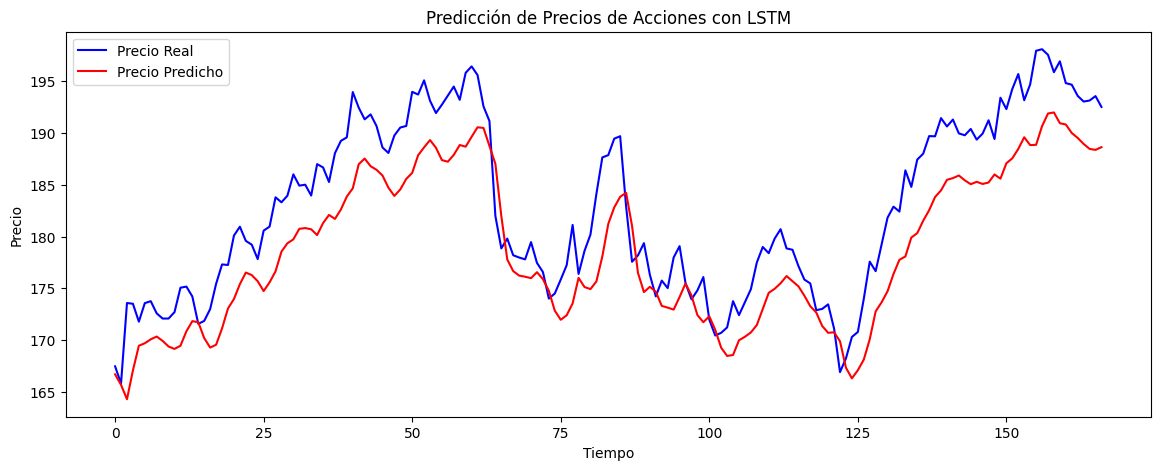

In [112]:
#Modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Entrenar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_scaled, predictions)

print(f'Mean Squared Error: {mse}')

# Visualizar resultados
plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, color='blue', label='Precio Real')
plt.plot(predictions, color='red', label='Precio Predicho')
plt.title('Predicción de Precios de Acciones con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')



#Evaluación y comparación de desempeño:

 Se evaluó el modelo tanto en los datos de entrenamiento como en los conjuntos de validación y prueba después del entrenamiento. Se calcularon y compararon los valores de RMSE (Root Mean Squared Error) para medir el desempeño del modelo en cada conjunto de datos